<a href="https://colab.research.google.com/github/noctxrne/DSA-ICT/blob/main/Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ctest=pd.read_csv("/content/Testing_data.csv")

In [3]:
ctrain=pd.read_csv("/content/Training_data.csv")

In [4]:
ctest

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [5]:
print(ctrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
print(ctest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [7]:
ctest.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
ctrain.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [9]:
# Convert numeric-looking columns to numeric
for col in ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in ctrain.columns:
        ctrain[col] = pd.to_numeric(ctrain[col], errors='coerce')
        ctest[col] = pd.to_numeric(ctest[col], errors='coerce')

In [10]:
ctrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [11]:
# Manually filling null values with median (We can use pipelines instead of this to avoid data leakage)
# # Fill missing values
# ctrain.fillna(ctrain.median(numeric_only=True), inplace=True)
# ctest.fillna(ctest.median(numeric_only=True), inplace=True)

In [12]:
#Filling missing values with respective medain  or mode

from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy = 'most_frequent')
median_imputer = SimpleImputer(strategy='median')

ctrain[['gender', 'OnlineSecurity']] = mode_imputer.fit_transform(ctrain[['gender', 'OnlineSecurity']])
ctrain[['MonthlyCharges', 'TotalCharges']] = median_imputer.fit_transform(ctrain[['MonthlyCharges', 'TotalCharges']])

categorical = ctrain.drop(['customerID'], axis=1).select_dtypes(include=['object']).columns
numerical   = ctrain.drop(['Churn','customerID'], axis=1).select_dtypes(exclude=['object']).columns

In [13]:
categorical

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [14]:
numerical

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [15]:
#Checking to see if there is any redundant extra category present
#printing categorical columns and corresponding unique data
for col in categorical:
  print(f"{col} {ctrain[col].unique()}")

gender ['Female' 'Male']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'No phone service' 'Yes']
InternetService ['No' 'DSL' 'Fiber optic']
OnlineSecurity ['No internet service' 'No' 'Yes']
OnlineBackup ['No internet service' 'No' 'Yes']
DeviceProtection ['No internet service' 'Yes' 'No']
TechSupport ['No internet service' 'Yes' 'No']
StreamingTV ['No internet service' 'No' 'Yes']
StreamingMovies ['No internet service' 'No' 'Yes']
Contract ['One year' 'Month-to-month' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [16]:
#Treating the redundant extra category 'No internet service' as 'No' an existing category

ctrain[['MultipleLines','OnlineSecurity', 'OnlineBackup',
     'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies']] = ctrain[['MultipleLines','OnlineSecurity', 'OnlineBackup',
                                               'DeviceProtection', 'TechSupport',
                                               'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [17]:
ctrain['Churn'].value_counts()


,count
Churn,
No,4130
Yes,1504


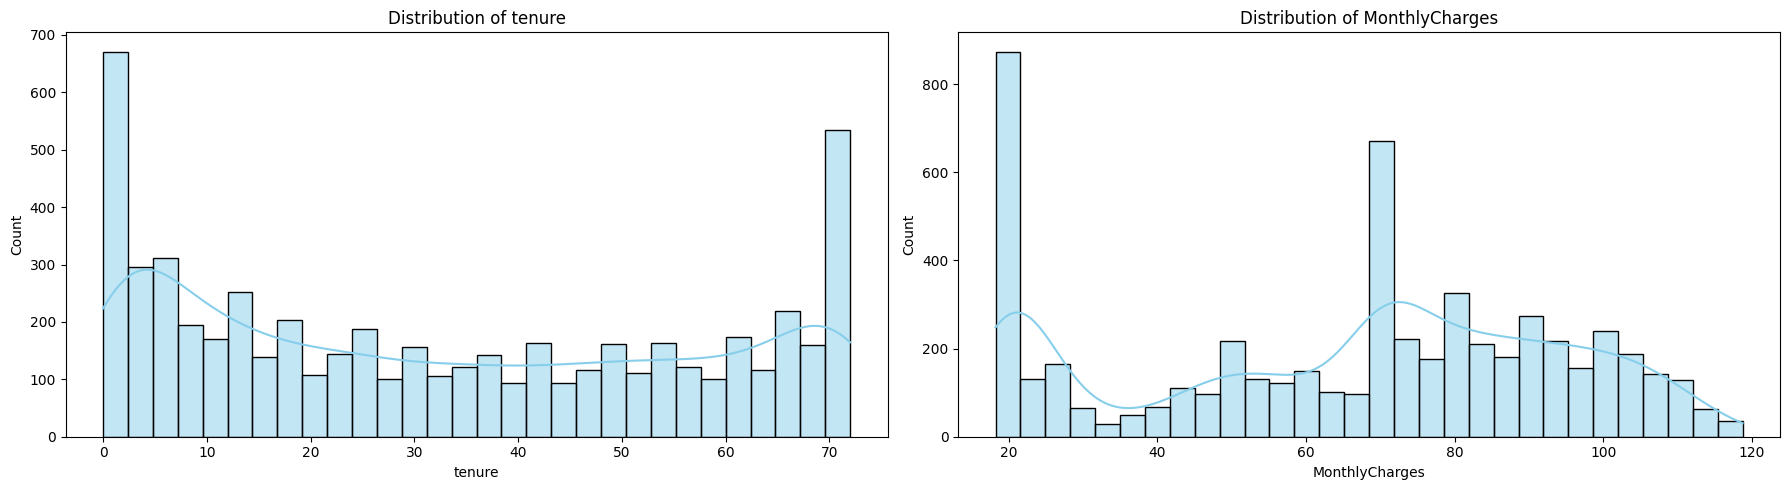

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for univariate analysis
check_cols = ['tenure', 'MonthlyCharges']

# Create subplot grid
fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(check_cols):
    sns.histplot(ctrain[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [19]:
#Label Encoding categorical

from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
for col in categorical:
  ctrain[col] = lab_enc.fit_transform(ctrain[col])

ctrain.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,0,0,0,0,35,1,0,2,0,...,0,0,0,0,1,0,3,20.75,700.45,0
1,7746-AWNQW,0,0,0,0,28,0,1,0,0,...,1,1,0,0,0,1,3,35.75,961.40,0
2,2208-UGTGR,1,0,0,0,56,1,2,1,0,...,0,0,1,1,0,0,2,98.60,5581.05,0
3,4884-LEVMQ,1,0,1,0,39,1,0,2,0,...,0,0,0,0,2,1,0,20.45,790.00,0
4,6682-VCIXC,0,0,1,1,43,0,1,0,0,...,0,1,1,0,1,1,0,51.25,2151.60,0


In [20]:
# Performing all the operations done above on ctrain to ctest also
#################################################################################

#Filling missing values with respective medain  or mode

ctest[['gender', 'OnlineSecurity']] = mode_imputer.fit_transform(ctest[['gender', 'OnlineSecurity']])
ctest[['MonthlyCharges', 'TotalCharges']] = median_imputer.fit_transform(ctest[['MonthlyCharges', 'TotalCharges']])

categorical = ctest.drop(['customerID'], axis=1).select_dtypes(include=['object']).columns
numerical   = ctest.drop(['Churn','customerID'], axis=1).select_dtypes(exclude=['object']).columns

#Treating the redundant extra category 'No internet service' as 'No' an existing category

ctest[['MultipleLines','OnlineSecurity', 'OnlineBackup',
     'DeviceProtection', 'TechSupport',
     'StreamingTV', 'StreamingMovies']] = ctest[['MultipleLines','OnlineSecurity', 'OnlineBackup',
                                               'DeviceProtection', 'TechSupport',
                                               'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

#Label Encoding categorical

from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
for col in categorical:
  ctest[col] = lab_enc.fit_transform(ctest[col])

ctest.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,1,0,1,1,40,1,2,1,0,...,1,0,0,0,0,1,2,81.20,3292.30,0
1,7285-KLOTR,0,0,1,0,12,1,2,0,1,...,1,0,1,1,1,0,2,78.85,876.75,0
2,7486-KSRVI,1,0,0,0,43,1,2,1,0,...,0,1,1,1,1,1,2,100.00,4211.55,1
3,9924-JPRMC,1,0,0,0,72,1,2,1,1,...,1,1,1,1,2,1,2,118.20,8547.15,0
4,4439-YRNVD,0,0,0,0,10,0,1,0,0,...,0,1,0,0,0,0,2,36.25,374.00,0


In [21]:
#Asssigning target value and rest other values for both ctrain and ctest

y_train = ctrain['Churn']
x_train = ctrain.drop(columns=['customerID', 'Churn'])

y_test = ctest['Churn']
x_test = ctest.drop(columns=['customerID', 'Churn'])

In [22]:
x_train[['tenure','MonthlyCharges', 'TotalCharges']].skew()

,0
tenure,0.227944
MonthlyCharges,-0.283808
TotalCharges,1.039322


In [23]:
#Scaling
from sklearn.preprocessing import StandardScaler, PowerTransformer

std_scaler = StandardScaler()
pow_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

x_train[['tenure','MonthlyCharges']] = std_scaler.fit_transform(x_train[['tenure','MonthlyCharges']])
x_train[['TotalCharges']] = pow_transformer.fit_transform(x_train[['TotalCharges']])

x_test[['tenure','MonthlyCharges']] = std_scaler.transform(x_test[['tenure','MonthlyCharges']])
x_test[['TotalCharges']] = pow_transformer.transform(x_test[['TotalCharges']])

## **Model**

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200)
}

# Dictionary to store results
results = {}

# Train, predict, and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Print results
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    for metric_name, value in metrics.items():
        if metric_name == "Confusion Matrix":
            print(f"{metric_name}:\n{value}")
        else:
            print(f"{metric_name}: {value:.4f}")



=== Decision Tree ===
Accuracy: 0.7268
Precision: 0.4755
Recall: 0.5315
F1 Score: 0.5019
Confusion Matrix:
[[830 214]
 [171 194]]

=== Logistic Regression ===
Accuracy: 0.8112
Precision: 0.6737
Recall: 0.5260
F1 Score: 0.5908
Confusion Matrix:
[[951  93]
 [173 192]]

=== Random Forest ===
Accuracy: 0.8034
Precision: 0.6517
Recall: 0.5178
F1 Score: 0.5771
Confusion Matrix:
[[943 101]
 [176 189]]


In [25]:
# #DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# depth_range = np.arange(2, 21)
# split_range = np.arange(2, 21)

# accuracy_matrix = np.zeros((len(depth_range), len(split_range)))

# for i, d in enumerate(depth_range):
#   for j, s in enumerate(split_range):
#     classifier = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=d, min_samples_split=s, random_state=42)
#     classifier.fit(x_train, y_train)
#     y_pred = classifier.predict(x_test)
#     accuracy_matrix[i, j] = (accuracy_score(y_test, y_pred))

# # Evaluate
# print("=== DecisionTreeClassifier ===")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [26]:
# # Logistic Regression

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Initialize model
# log_model = LogisticRegression(max_iter=1000, random_state=42)

# # Train on training data
# log_model.fit(x_train, y_train)

# # Predict on test data
# y_pred_log = log_model.predict(x_test)

# # Evaluate
# print("=== Logistic Regression ===")
# print("Accuracy:", accuracy_score(y_test, y_pred_log))
# print("Precision:", precision_score(y_test, y_pred_log))
# print("Recall:", recall_score(y_test, y_pred_log))
# print("F1 Score:", f1_score(y_test, y_pred_log))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


In [27]:
# # RandomForest

# # Import
# from sklearn.ensemble import RandomForestClassifier

# # Initialize model
# rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)

# # Train on training data
# rf_model.fit(x_train, y_train)

# # Predict on test data
# y_pred_rf = rf_model.predict(x_test)

# # Evaluate
# print("\n=== Random Forest ===")
# print("Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Precision:", precision_score(y_test, y_pred_rf))
# print("Recall:", recall_score(y_test, y_pred_rf))
# print("F1 Score:", f1_score(y_test, y_pred_rf))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


## **Model Fine-Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model on test data
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print("F1 Score:", f1_score(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20}
F1 Score: 0.544891640866873
Accuracy: 0.7913413768630234
Confusion Matrix:
 [[939 105]
 [189 176]]


In [29]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),   # handles missing values
#     ('scaler', StandardScaler())                     # scaling after imputation
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')), # fill with mode for categorical
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical),
#         ('cat', categorical_transformer, categorical)
#     ]
# )
